In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [42]:
X = pd.read_pickle('feature_df.pkl')
y = pd.read_pickle('target.pkl')

In [43]:
X.shape

(37547, 36)

In [5]:
X_test.shape

NameError: name 'X_test' is not defined

In [134]:
X_train.shape

(30037, 36)

In [135]:
y_train.shape

(30037,)

In [136]:
y_test.shape

(7510,)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [130]:
clf = RandomForestClassifier(n_jobs=-1, max_depth=25, max_features=20, min_samples_split=3, n_estimators=1000)
clf.fit(X_train, y_train)
prob = clf1.predict_proba(X_test)[:,1]

In [137]:
prob

array([0.01909799, 0.07440178, 0.00125   , ..., 0.0273499 , 0.03273646,
       0.10783333])

In [145]:
print(np.mean(cross_val_score(clf, X_train, y_train, cv=10)))

0.9152378469289255


In [138]:
thr = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1,0.15, 0.2, 0.25, 0.3, 0.35]
recalls = []
precisions = []
y_pred = []

In [142]:
for t in thr:
    y_pred = [1 if x > t else 0 for x in prob]
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recalls.append(recall)
    precisions.append(precision)
    print('for ',t)
    print('recall: ', recall_score(y_test, y_pred))
    print('precision: ', precision_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred).ravel())
    print('f1 score: ', f1_score(y_test, y_pred))

for  0.01
recall:  0.9800664451827242
precision:  0.10023785253143051
[1612 5296   12  590]
f1 score:  0.1818742293464858
for  0.02
recall:  0.9667774086378738
precision:  0.11570576540755467
[2460 4448   20  582]
f1 score:  0.20667613636363638
for  0.03
recall:  0.9551495016611296
precision:  0.13282513282513284
[3154 3754   27  575]
f1 score:  0.233218414114784
for  0.04
recall:  0.9302325581395349
precision:  0.15037593984962405
[3744 3164   42  560]
f1 score:  0.2588996763754045
for  0.05
recall:  0.915282392026578
precision:  0.1680390362915523
[4180 2728   51  551]
f1 score:  0.2839474362277764
for  0.06
recall:  0.8920265780730897
precision:  0.19449474827960883
[4684 2224   65  537]
f1 score:  0.3193577163247101
for  0.07
recall:  0.8687707641196013
precision:  0.21764461090303788
[5028 1880   79  523]
f1 score:  0.3480865224625624
for  0.08
recall:  0.8504983388704319
precision:  0.24219489120151372
[5306 1602   90  512]
f1 score:  0.37702503681885124
for  0.09
recall:  0.8405

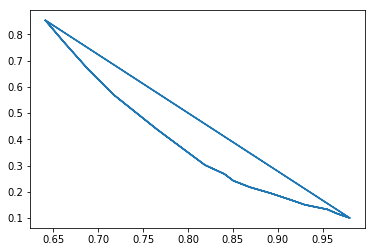

In [143]:
plt.plot(recalls, precisions)

In [5]:
y.shape

(37547,)

In [45]:
param_grid = {
    'min_samples_split': [2,3,5,10], 
    'n_estimators' : [75, 200, 300, 500, 1000],
    'max_depth': [15, 25, 28, 30],
    'max_features': [3, 5, 10, 20, 25],
    'criterion' : ['gini', 'entropy']
}

In [46]:
clf = RandomForestClassifier(n_jobs=-1)

In [ ]:
grid_search = GridSearchCV(clf, param_grid, scoring='f1', return_train_score=True, n_jobs=-1, cv=10)
grid_search.fit(X_train, y_train)

/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages

/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages

/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages

/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages

/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages

/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages

/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages

/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages

/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages

/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages

/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shaked/miniconda3/lib/python3.6/site-packages

In [122]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 25,
 'max_features': 20,
 'min_samples_split': 2,
 'n_estimators': 75}

In [15]:
confusion_matrix(y_test, y_pred).ravel()

array([11350,     0,  1041,     0])

In [63]:
clf = RandomForestClassifier(n_jobs=-1, max_depth=25, max_features=20, min_samples_split=3, n_estimators=100)

In [78]:
predict = clf1.predict(X_test)

In [80]:
confusion_matrix(y_test, predict).ravel()

array([11312,    38,  1030,    11])

In [81]:
f1_score(y_test, predict)

0.020183486238532108

In [64]:
clf1.fit(X_train, y_train)
prob = clf1.predict_proba(X_test)[:,1]

In [19]:
confusion_matrix(y_test, predictions).ravel()

array([11350,     0,  1041,     0])

In [58]:
thr = 0.2

In [70]:
prob 

array([0.04263633, 0.04417744, 0.02573333, ..., 0.09333333, 0.00333333,
       0.4415    ])

In [61]:
confusion_matrix(y_test, y_pred).ravel()

array([9925, 1425,  707,  334])

In [71]:
thr = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1,0.15, 0.2, 0.25, 0.3, 0.35]
recalls = []
precisions = []
y_pred = []

In [106]:
for t in thr:
    y_pred = [1 if x > t else 0 for x in prob]
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recalls.append(recall)
    precisions.append(precision)
    print(t)
    print(confusion_matrix(y_test, y_pred).ravel())
    print(f1_score(y_test, y_pred))

0.01
[1842 9508   77  964]
0.16746286806219055
0.02
[2821 8529  120  921]
0.1755790677723763
0.03
[3677 7673  170  871]
0.18174230568596766
0.04
[4527 6823  224  817]
0.1882271627692662
0.05
[5200 6150  256  785]
0.1968405215646941
0.06
[5897 5453  308  733]
0.20285042202850423
0.07
[6451 4899  357  684]
0.20652173913043478
0.08
[6903 4447  386  655]
0.21325085463128762
0.09
[7320 4030  419  622]
0.2185139645178289
0.1
[7770 3580  458  583]
0.22405841660261336
0.15
[9119 2231  597  444]
0.2389666307857912
0.2
[9952 1398  721  320]
0.231968104385647
0.25
[10454   896   817   224]
0.2073114298935678
0.3
[10821   529   895   146]
0.17016317016317017
0.35
[11048   302   942    99]
0.13730929264909847


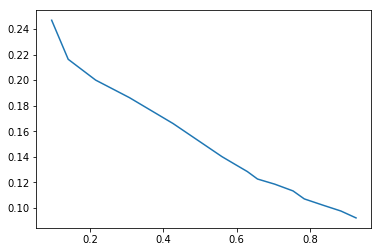

In [74]:
plt.plot(recalls, precisions)

In [76]:
print(recalls)
print(precisions)

[0.9260326609029779, 0.8847262247838616, 0.8366954851104706, 0.7848222862632085, 0.7540826128722382, 0.7041306436119116, 0.6570605187319885, 0.6292026897214217, 0.5975024015369836, 0.5600384245917387, 0.4265129682997118, 0.30739673390970224, 0.21517771373679154, 0.14024975984630164, 0.09510086455331412]
[0.0920550038197097, 0.09746031746031746, 0.10194288389513109, 0.10693717277486911, 0.11319394376351838, 0.11849337213061753, 0.12251477700161204, 0.12838102704821638, 0.13370593293207222, 0.14004323804948354, 0.16598130841121495, 0.18626309662398138, 0.2, 0.2162962962962963, 0.24688279301745636]


In [107]:
t = 0.15
y_pred = [1 if x > t else 0 for x in prob]

In [6]:
X_copy = X.copy()

In [7]:
chi2_selector = SelectKBest(chi2, k=10)
X_kbest = chi2_selector.fit_transform(X_copy, y)

In [12]:
X_kbest

array([[ 48., 991., 991., ...,  18., 991., 991.],
       [991., 991., 991., ..., 991., 991., 991.],
       [ 52., 144., 991., ...,  12., 991.,  14.],
       ...,
       [991., 991., 991., ..., 991., 991., 991.],
       [ 36., 993., 991., ...,  14., 991.,  14.],
       [ 24.,   8., 993., ...,  14., 991.,  16.]])

In [13]:
scores = chi2_selector.scores_

In [15]:
sorted(scores)

[0.0014263257557676867,
 0.3257519920971254,
 1.7929888650501813,
 3.6193210470367863,
 4.151784080738111,
 6.806644424573852,
 7.391825256023583,
 21.7836339726231,
 22.17564546577486,
 23.546960508837387,
 27.63951381629718,
 40.75726503591271,
 58.2157543617464,
 60.8602506498691,
 80.78280266456356,
 93.6748065675372,
 145.4211622190078,
 156.4105222307369,
 170.21038743258336,
 179.9850005379212,
 195.20288283017902,
 250.73605422813134,
 495.70548815414855,
 594.0655959782046,
 948.7358943002114,
 2227.879769003412,
 2395.7188961142783,
 2466.5662878022276,
 6144.9066954142645,
 8309.446803659132,
 16596.563464622956,
 16666.467870490575,
 21725.554867145056,
 29283.73070429921,
 40851.53512047081,
 62485.72854972982,
 213326.06074692204]

Random Forest on 37 features

In [55]:
y_test.value_counts(normalize=True)

0    0.915987
1    0.084013
Name: AMDEYR, dtype: float64

In [56]:
y_train.value_counts(normalize=True)

0    0.917674
1    0.082326
Name: AMDEYR, dtype: float64

In [47]:
clf.feature_importances_ 

array([0.12337793, 0.04484158, 0.01831621, 0.00388245, 0.0047429 ,
       0.02018619, 0.01396807, 0.02943173, 0.02455375, 0.01673194,
       0.00773988, 0.04521862, 0.01385766, 0.01311229, 0.00471551,
       0.01001274, 0.00054893, 0.01074428, 0.08735306, 0.05861614,
       0.02312944, 0.10997363, 0.00975279, 0.07271062, 0.00293655,
       0.01094903, 0.01132863, 0.00704772, 0.00818599, 0.00298162,
       0.00296477, 0.00312205, 0.05996471, 0.04945083, 0.02030683,
       0.05324292])

In [112]:
feature_importances = pd.DataFrame(clf1.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [113]:
feature_importances

,importance
IRALCFY,0.119660
IRALCAGE,0.107398
IRCIGAGE,0.088479
SUMAGE,0.073412
IRCGRAGE,0.062111
EDUCCAT2,0.057043
INCOME,0.050651
IRMJFY,0.050020
IRCIGFM,0.049829
CATAG6,0.044949


In [48]:
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

In [110]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

Text(0.5,15,'False Positive Rate')

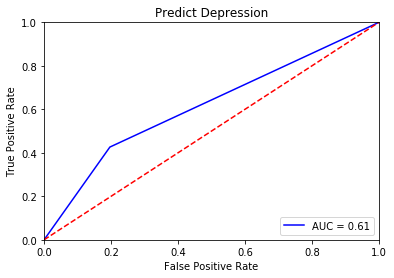

In [111]:
plt.title('Predict Depression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Random Forest on one feature

In [57]:
probs = clf1.predict_proba(X_test1)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test1, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

Text(0.5,15,'False Positive Rate')

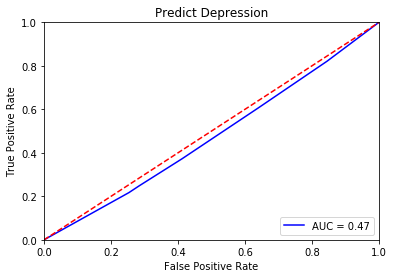

In [58]:
plt.title('Predict Depression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [148]:
df= pd.read_pickle('df.pkl')

In [147]:
df.head()

,CASEID,QUESTID2,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,CG30EST,CIG30AV,CIG30BR2,CIG30TPE,CIG30MEN,CIG30MLN,CIG30RO2,CIGDLYMO,CIGAGE,CIGDLYFU,CIGDLMFU,CIG100LF,SNFEVER,SNUFTRY,SNUFYFU,SNUFMFU,SNFREC,SNF30USE,SN30EST,SNF30BR2,CHEWEVER,CHEWTRY,CHEWYFU,CHEWMFU,CHEWREC,CHW30USE,CH30EST,CHW30BR2,SLTTRY,SLTYFU,SLTMFU,SLTREC,SLT30BR2,SLT30FAV,CIGAREVR,CIGARTRY,CIGARYFU,CIGARMFU,CIGARREC,CGR30USE,CI30EST,CGR30BR2,PIPEVER,PIPE30DY,ALCEVER,ALCTRY,ALCYFU,ALCMFU,ALCREC,ALCYRTOT,ALTOTFG,ALFQFLG,ALBSTWAY,ALDAYPYR,ALDAYPMO,ALDAYPWK,ALCDAYS,AL30EST,ALDYSFG,NODR30A,DR5DAY,MJEVER,MJAGE,MJYFU,MJMFU,MJREC,MJYRTOT,MRTOTFG,MJFQFLG,MRBSTWAY,MRDAYPYR,MRDAYPMO,MRDAYPWK,MJDAY30A,MR30EST,COCEVER,COCAGE,...,INCOME,POVERTY2,HLCALLFG,HLCALL99,ANYHLTI2,IRINSUR4,IIINSUR4,OTHINS,LANGVER,QUARTER,GQTYPE2,AGE2,NOMARR2,SERVICE,MILSTAT,HEALTH,IRSEX,IRMARIT,IIMARIT,IREDUC2,IIEDUC2,CATAGE,CATAG2,CATAG3,CATAG6,CATAG7,PREGAGE2,SEXAGE,NEWRACE2,SEXRACE,EDUCCAT2,HEALTH2,MOVESPY2,EIMOVPYR,MOVYRFLG,SCHENRL,EDUCATN2,SDNTFTPT,SCHDSICK,SCHDSKIP,HSDIPLMA,HSGED,LFSCHWH2,LFTSCHA2,TELNO2,COLLENR,COLLENR2,JBSTATR2,WRKHAVJB,WRKHRSW2,WRKIDST2,WRKOCUP2,WRKBZCA2,WRKEDYR,WRKSLFEM,WRKJOBS2,WRKUNEMP,WRKUNWKS,WRKLSTY2,WRKIDSY2,WRKOCUY2,WRKBZCY2,WORKDAYS,WORKBLAH,LOCSIZE,DRGPLCY,PLCYCOV,WKDRGED,DRGPRGM,USALCTST,USDRGTST,TSTHIRE,TSTRAND,FIRSTPOS,WRKHIRE,WORKRAND,EMPSTATY,IIEMPSTY,II2EMSTY,EMPSTAT4,IIEMPST4,II2EMST4,PDEN00,COUTYP2,ANALWT_C,VESTR,VEREP
0,1,50886467,2,4,4,991,9991,91,91,91,91,91,9991,91,91,91,91,91,991,9991,91,91,2,991,9991,91,91,91,91,9991,2,991,9991,91,91,91,91,9991,991,9991,91,91,9991,91,2,991,9991,91,91,91,91,9991,2,91,1,15,2011,7,3,993,98,98,93,993,93,93,93,93,98,993,93,2,991,9991,91,91,991,98,98,91,991,91,91,91,91,2,991,...,3,2,98,98,1,1,1,2,1,3,-9,5,99,99,99,1,2,4,1,6,1,1,1,1,1,3,1,2,1,2,5,1,0,1,98,1,7,1,90,99,99,99,999,999,1,3,5,4,2,999,9999,9999,99,2,99,99,99,99,9991,9999,9999,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,3,1,1,99,9,9,2,2,1275.597449,30054,2
1,2,13766883,2,99,99,991,9991,91,91,91,91,91,9991,91,91,91,91,91,991,9991,91,91,2,991,9991,91,91,91,91,9991,2,991,9991,91,91,91,91,9991,991,9991,91,91,9991,91,2,991,9991,91,91,91,91,9991,2,91,1,18,9999,99,1,48,98,98,2,999,4,99,4,99,98,1,1,2,991,9991,91,91,991,98,98,91,991,91,91,91,91,2,991,...,3,3,98,98,2,2,1,2,1,3,-9,16,1,2,99,1,2,1,1,10,1,4,3,5,5,7,4,5,1,2,3,1,0,1,98,2,13,99,99,99,99,99,999,999,1,3,5,1,99,30,12,9,7,99,5,1,2,99,9999,9999,9999,99,0,0,1,2,99,2,2,2,2,99,99,99,1,1,1,1,1,1,1,1,2,2,5191.071173,30031,1
2,3,17772877,2,99,99,991,9991,91,91,91,91,91,9991,91,91,91,91,91,991,9991,91,91,2,991,9991,91,91,91,91,9991,2,991,9991,91,91,91,91,9991,991,9991,91,91,9991,91,2,991,9991,91,91,91,91,9991,2,91,2,991,9991,91,91,991,98,98,91,991,91,91,91,91,98,991,91,2,991,9991,91,91,991,98,98,91,991,91,91,91,91,2,991,...,2,2,98,98,1,1,1,2,1,3,-9,10,99,2,99,2,1,4,1,8,1,2,2,2,2,5,2,3,1,1,2,2,2,1,98,1,9,1,90,99,99,99,999,999,1,1,1,1,99,43,2,7,1,99,2,1,1,48,9999,9999,9999,99,0,0,4,1,3,1,94,94,94,98,98,98,3,3,1,1,1,1,1,1,3,3,419.742011,30056,2
3,4,45622817,1,99,99,13,9999,99,2,93,93,93,9993,93,93,93,93,2,999,9999,99,2,2,991,9991,91,91,91,91,9991,2,991,9991,91,91,91,91,9991,991,9991,91,91,9991,91,1,14,9999,99,3,93,93,9993,2,91,1,12,9999,99,1,52,98,98,1,999,99,1,6,99,98,10,4,1,14,9999,99,1,144,98,98,2,999,12,99,8,99,1,17,...,1,1,98,98,1,1,1,2,1,2,-9,10,99,2,99,2,1,4,1,10,1,2,2,2,2,5,2,3,1,1,3,2,1,1,98,1,11,1,0,5,99,99,999,999,0,1,1,2,99,12,1,10,2,99,1,4,2,99,9999,9999,9999,99,0,2,1,2,99,2,2,2,1,1,2,2,3,3,2,1,1,2,1,1,2,2,1449.303889,30054,1
4,5,17239390,1,99,99,11,9999,99,4,93,93,93,9993,93,93,93,93,2,999,9999,99,2,2,991,9991,91,91,91,91,9991,2,991,9991,91,91,91,91,9991,991,9991,91,91,9991,91,1,25,9999,99,4,93,93,9993,2,91,1,17,9999,99,1,260,98,98,1,999,99,5,25,99,98,1,0,2,991,9991,91,91,991,98,98,91,991,91,91,91,91,2,991,...,4,3,98,98,1,1,1,1,1,3,-9,17,2,2,99,2,1,2,1,11,1,4,3,5,6,7,4,5,1,1,4,2,0,1,98,2,13,99,99,99,99,99,999,999,1,3,5,1,99,40,11,1,7,99,5,1,2,99,9999,9999,9999,99,0,0,1,2,99,2,2,2,2,99,99,99,2,

XGboosting


In [6]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=123)

In [7]:
xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [21]:
xg_reg.fit(X_train1,y_train1)

preds = xg_reg.predict_proba(X_test1)[:,1]

In [189]:
rmse = np.sqrt(mean_squared_error(y_test1, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.280764


In [22]:
preds

array([0.22678073, 0.20746775, 0.21531889, ..., 0.2366664 , 0.21164033,
       0.22809029], dtype=float32)

In [23]:
thr = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1,0.15, 0.2, 0.25, 0.3, 0.35]
recalls = []
precisions = []
y_pred = []

In [24]:
for t in thr:
    y_pred = [1 if x > t else 0 for x in preds]
    recall = recall_score(y_test1, y_pred)
    precision = precision_score(y_test1, y_pred)
    recalls.append(recall)
    precisions.append(precision)
    print(t)
    print(confusion_matrix(y_test1, y_pred).ravel())
    print(f1_score(y_test1, y_pred))

0.01
[   0 6918    0  592]
0.1461367563564552
0.02
[   0 6918    0  592]
0.1461367563564552
0.03
[   0 6918    0  592]
0.1461367563564552
0.04
[   0 6918    0  592]
0.1461367563564552
0.05
[   0 6918    0  592]
0.1461367563564552
0.06
[   0 6918    0  592]
0.1461367563564552
0.07
[   0 6918    0  592]
0.1461367563564552
0.08
[   0 6918    0  592]
0.1461367563564552
0.09
[   0 6918    0  592]
0.1461367563564552
0.1
[   0 6918    0  592]
0.1461367563564552
0.15
[   0 6918    0  592]
0.1461367563564552
0.2
[   0 6918    0  592]
0.1461367563564552
0.25
[5864 1054  362  230]
0.24520255863539447
0.3
[6738  180  529   63]
0.15089820359281436
0.35
[6903   15  581   11]
0.03559870550161812


In [25]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [36]:
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3, metrics='auc',
                    num_boost_round=50,early_stopping_rounds=10, as_pandas=True, seed=123)

In [37]:
cv_results.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.594039,0.026391,0.591169,0.018779
1,0.623236,0.032909,0.617005,0.030607
2,0.637102,0.016076,0.630083,0.016302
3,0.643647,0.020125,0.637070,0.022374
4,0.654048,0.020985,0.649433,0.019100


In [38]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

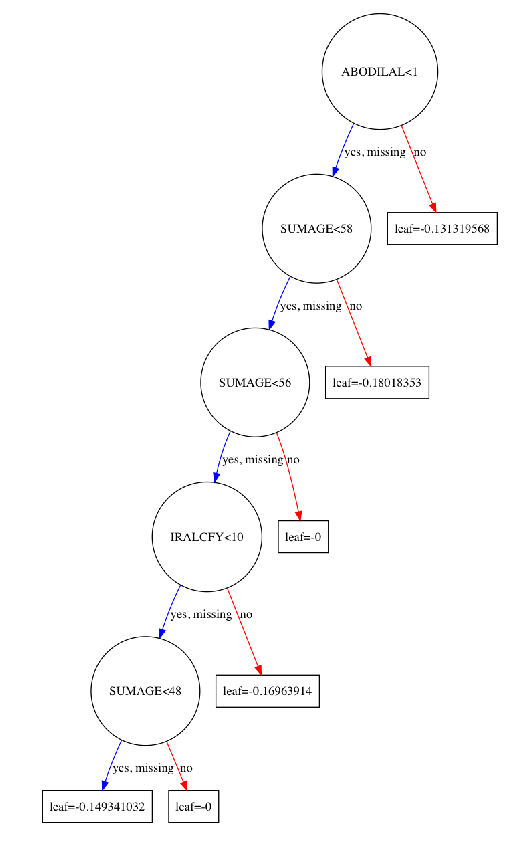

In [40]:
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]

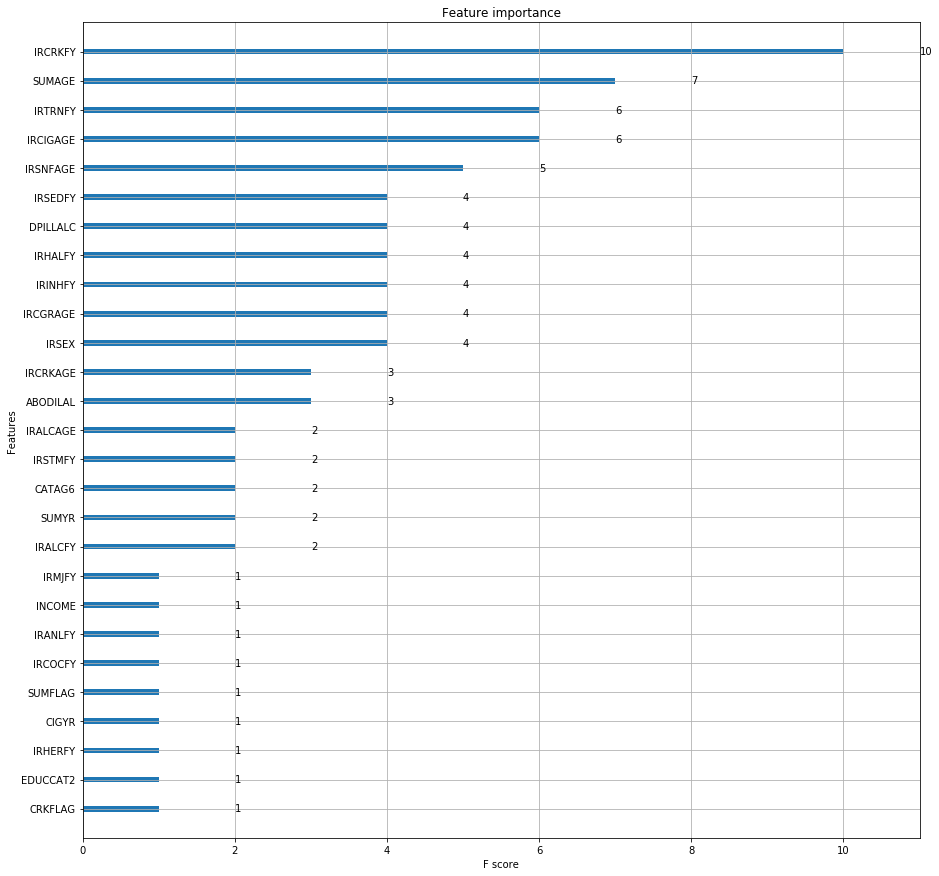

In [39]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [15, 15]